<a href="https://colab.research.google.com/github/always-newbie161/pyprobml/blob/hermissue185/notebooks/clip_imagenette_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook illustrates the following on CLIP extracted features of Imagenette v2 dataset


*   Classification using MLP using flax+JAX
*   Logistic Regression using flax+JAX
*   Logistic Regression using sklearn
*   Logistic Regression using pytorch-lightning


---


Author : Srikar-Reddy-Jilugu(@always-newbie161)






In [1]:
!nvidia-smi

Thu Jun 24 17:39:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Required Installations

make these dirs just to be consistent with the original repo

In [2]:
!mkdir data
!mkdir notebooks

In [3]:
cd notebooks

/content/notebooks


Getting the clip_dataloader.py for pyprobml which gets the dataloaders for **CLIP extracted fetures** of imagenette v2 dataset

In [4]:
!wget https://raw.githubusercontent.com/probml/pyprobml/master/scripts/clip_dataloader.py

--2021-06-24 17:39:18--  https://raw.githubusercontent.com/probml/pyprobml/master/scripts/clip_dataloader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K) [text/plain]
Saving to: ‘clip_dataloader.py’

clip_dataloader.py  100%[===================>]   2.78K  --.-KB/s    in 0s      

2021-06-24 17:39:18 (30.7 MB/s) - ‘clip_dataloader.py’ saved [2844/2844]



In [5]:
!pip install flax
!pip install pytorch-lightning
!pip install wget

     |████████████████████████████████| 184kB 30.7MB/s 
     |████████████████████████████████| 122kB 40.6MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 819kB 32.4MB/s 
     |████████████████████████████████| 276kB 41.1MB/s 
     |████████████████████████████████| 645kB 46.4MB/s 
     |████████████████████████████████| 122kB 56.3MB/s 
     |████████████████████████████████| 10.6MB 44.4MB/s 
     |████████████████████████████████| 829kB 40.7MB/s 
     |████████████████████████████████| 1.3MB 47.6MB/s 
     |████████████████████████████████| 296kB 57.3MB/s 
     |████████████████████████████████| 143kB 54.7MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=28607f5a5fbc9db0a281979aaac429955472d2d722e490a2937fc48293ec8f91
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
ERROR: tensorflow 2.5.0 has requirement ten

### Downloading original Imagenette dataset

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds

try:
  data, info = tfds.load("imagenette/160px-v2", with_info=True, as_supervised=True)
except:
  data, info = tfds.load("imagenette/160px-v2", with_info=True, as_supervised=True)

train_data, test_data = data['train'], data['validation']

Shuffling and writing examples to /root/tensorflow_datasets/imagenette/160px-v2/0.1.0.incompleteJD58TS/imagenette-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imagenette/160px-v2/0.1.0.incompleteJD58TS/imagenette-validation.tfrecord


Dataset imagenette downloaded and prepared to /root/tensorflow_datasets/imagenette/160px-v2/0.1.0. Subsequent calls will reuse this data.


In [7]:
print(info)

tfds.core.DatasetInfo(
    name='imagenette',
    version=0.1.0,
    description='Imagenette is a subset of 10 easily classified classes from the Imagenet
dataset. It was originally prepared by Jeremy Howard of FastAI. The objective
behind putting together a small version of the Imagenet dataset was mainly
because running new ideas/algorithms/experiments on the whole Imagenet take a
lot of time.

This version of the dataset allows researchers/practitioners to quickly try out
ideas and share with others. The dataset comes in three variants:

  * Full size
  * 320 px
  * 160 px

Note: The v2 config correspond to the new 70/30 train/valid split (released
in Dec 6 2019).',
    homepage='https://github.com/fastai/imagenette',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=13394,
    splits={
        'train': 9469,
        'validation': 3925,
    }

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from clip_dataloader import get_imagenette_clip_loaders

Getting the CLIP-extracted data for the Imagenette dataset.

In [9]:
# zip files of the data will be stored in "dir_name" directory.
train_loader, test_loader = get_imagenette_clip_loaders(dir_name='../data')

def convert_dataloader_to_numpy(loader):
    features, labels = [], []

    for batch in loader:
        features.append(batch[0])
        labels.append(batch[1])

    features, labels = np.concatenate(features), np.concatenate(labels)

    return features, labels

train_features, train_labels = convert_dataloader_to_numpy(train_loader)
test_features, test_labels = convert_dataloader_to_numpy(test_loader)

train_data zip-file not available in this dir, downloading from source...
train_data zip-file downloaded successfully
test_data zip-file not available in this dir, downloading from source...
test_data zip-file downloaded successfully
size of training_data: features:torch.Size([9469, 512]), labels:(9469,)
size of testing_data: features:torch.Size([3925, 512]), labels:(3925,)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Demo of MLP and Logreg using flax+JAX

In [10]:
import jax
from typing import Sequence
from jax import random, numpy as jnp
import flax
from flax.core import unfreeze
from flax import linen as nn
from flax.training import train_state
import optax # used for the optimizer
from functools import partial

Getting the **CLIP extracted features** data for the Imagenette-160px v2 dataset.

 A Simple neural network where all the hidden layers(h) along with the output layer(O) can be specified using
 
for MLP:

```
model = Simple_nn([h1, h2, h3...,O])
```
for LogReg:
```
model = Simple_nn([O])
```
you may refer to the official docs before proceeding

https://flax.readthedocs.io/en/latest/


In [11]:
class Simple_nn(nn.Module):
    features: Sequence[int]

    def setup(self):
        self.layers = [nn.Dense(feat) for feat in self.features]

    def __call__(self, inputs):
        x = inputs
        for i, lyr in enumerate(self.layers):
            x = lyr(x)
            if i != len(self.layers) - 1:
                x = nn.relu(x)
        x = nn.log_softmax(x)
        return x


In [12]:
class Flax_model:

    def __init__(self, layers, train_loader, test_data):
        """
        :type layers: list of no.of.units of hidden_layers and also the output_layer at the end
        :type train_loader: torch dataloader
        :type test_data: tuple of features and label data
        """
        self.train_loader = train_loader
        self.test_features, self.test_labels = test_data
        self.model = Simple_nn(layers)

    '''
    * Loss is used is cross_entropy_loss
    * Optimizer used is SGD with a decay rate(momentum) using optax, 
      the train_state of the Flax_model stores the model params and 
      the state of the model (i.e it stores the updated params and grads while training)
    * Initial params are returned by __init__ method of the nn.module using a random vector of the required features shape
    * Metrics used are __accuracy__ and __loss__
    '''

    def get_initial_params(self, key):
        # initiating the model with random input to kick-off the params.
        kx, kinit = random.split(key, 2)
        x = random.normal(kx, (1, self.test_features.shape[1]))  # shape of a sample of feature data.
        initial_params = self.model.init(kinit, x)['params']
        print('initialized parameter shapes:\n', jax.tree_map(jnp.shape, unfreeze(initial_params)))
        return initial_params

    def __create_train_state(self, init_params, tx):
        """
        tx : optax optmizer
        """
        return train_state.TrainState.create(
            apply_fn=self.model.apply,
            params=init_params,
            tx=tx
        )
    
    '''
    The bottleneck of flax model are the 
      train_step
      eval_step(validation_step)
      computing the metrics (loss and accuracy)
    
    Jitting the corresponding function speeds up the training.
    '''

    # JIT compiled loss and metric functions
    # model(general class) can't be jit complied, so it is passed as a static arg to the jitted funcitons.

    @partial(jax.jit, static_argnums=(0,))
    def __cross_entropy_loss(self, logprobs, labels):
        one_hot_labels = jax.nn.one_hot(labels, num_classes=logprobs.shape[1])
        return -jnp.mean(jnp.sum(one_hot_labels * logprobs, axis=-1))

    @partial(jax.jit, static_argnums=(0,))
    def compute_metrics(self, logprobs, labels):
        loss = self.__cross_entropy_loss(logprobs, labels)
        accuracy = jnp.mean(jnp.argmax(logprobs, -1) == labels)
        metrics = {
            'loss': loss,
            'accuracy': accuracy
        }
        return metrics

    # JIT compiled train and evaluation steps

    @partial(jax.jit, static_argnums=(0,))
    def __train_step(self, state, features, labels):
        def loss_fn(params):
            logprobs = self.model.apply({'params': params}, features)
            loss = self.__cross_entropy_loss(logprobs, labels)
            return loss, logprobs

        grad_fn = jax.value_and_grad(loss_fn, has_aux=True)
        (_, logprobs), grads = grad_fn(state.params)
        state = state.apply_gradients(grads=grads)
        metrics = self.compute_metrics(logprobs, labels)
        return state, metrics

    @partial(jax.jit, static_argnums=(0,))
    def __eval_step(self, params, features, labels):
        logprobs = self.model.apply({'params': params}, features)
        return self.compute_metrics(logprobs, labels)


    '''
    jax.device_get() is used to get the arrays from the Shared Device arrays from the device used.
    jax.tree_map() returns a pytree after doing respective task on the given pytree. 
    Refer JAX Docs for more info
    https://jax.readthedocs.io/en/latest/notebooks/thinking_in_jax.html

    '''

    # train routine for each epoch.
    def __train_epoch(self, state, epoch):
        batch_metrics = []
        for batch in self.train_loader:
            features, labels = batch  # The returned batch are torch tensors.
            features = features.to('cpu').numpy()
            labels = labels.to('cpu').numpy()

            state, metrics = self.__train_step(state, features, labels)
            batch_metrics.append(metrics)

        training_batch_metrics = jax.device_get(batch_metrics)
        training_epoch_metrics = {
            k: np.mean([metrics[k] for metrics in training_batch_metrics])
            for k in training_batch_metrics[0]}

        print('Training - epoch: %d, loss: %.4f, accuracy: %.2f' % (
            epoch, training_epoch_metrics['loss'], training_epoch_metrics['accuracy'] * 100))

        return state, training_epoch_metrics


    # Evaluate the model on the test set
    def eval_model(self, params, test_features, test_labels):
        metrics = self.__eval_step(params, test_features, test_labels)
        metrics = jax.device_get(metrics)
        eval_summary = jax.tree_map(lambda x: x.item(), metrics)
        return eval_summary['loss'], eval_summary['accuracy']

    def predict_logproba(self, params, test_features):
        logprobs = self.model.apply({'params': params}, test_features)
        # logprobs returned are log-softmax values.
        return np.array(logprobs)

    def get_params(self, state):
        return state.params

    # runs the flax model and returns the log_softmax values

    def run_flax_demo(self, key, learning_rate=0.1, decay_rate=0.9, num_epochs=10):

        init_rng = key

        init_params = self.get_initial_params(init_rng)

        # Momentum optimizer.
        tx = optax.chain(
            optax.trace(decay=decay_rate, nesterov=False),
            optax.scale(-learning_rate),
        )

        state = self.__create_train_state(init_params, tx)

        for epoch in range(1, num_epochs + 1):
            # Run an optimization step over a training batch
            state, train_metrics = self.__train_epoch(state, epoch)
            # Evaluate on the test set after each training epoch
            test_loss, test_accuracy = self.eval_model(self.get_params(state), self.test_features, self.test_labels)
            print('Testing - epoch: %d, loss: %.2f, accuracy: %.2f' % (epoch, test_loss, test_accuracy * 100))

        updated_model_params = self.get_params(state)

        test_pred_logproba_labels = self.predict_logproba(updated_model_params, self.test_features)

        return test_pred_logproba_labels, state.params

### MLP 

In [13]:
key = jax.random.PRNGKey(0)
# specify each layer after input layer with the corresponding no.of.units
layers = [32,10] 

flax_model_mlp = Flax_model(layers, train_loader, (test_features, test_labels))

flags = dict(learning_rate=0.1, decay_rate=0.9, num_epochs=20)
test_preds_logproba_flax_mlp, flax_mlp_params = flax_model_mlp.run_flax_demo(key, **flags)

initialized parameter shapes:
 {'layers_0': {'bias': (32,), 'kernel': (512, 32)}, 'layers_1': {'bias': (10,), 'kernel': (32, 10)}}


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training - epoch: 1, loss: 0.1794, accuracy: 95.23
Testing - epoch: 1, loss: 0.15, accuracy: 96.94
Training - epoch: 2, loss: 0.0893, accuracy: 98.03
Testing - epoch: 2, loss: 0.10, accuracy: 97.58
Training - epoch: 3, loss: 0.0572, accuracy: 98.62
Testing - epoch: 3, loss: 0.11, accuracy: 98.32
Training - epoch: 4, loss: 0.0513, accuracy: 98.94
Testing - epoch: 4, loss: 0.10, accuracy: 97.81
Training - epoch: 5, loss: 0.0386, accuracy: 99.04
Testing - epoch: 5, loss: 0.09, accuracy: 98.50
Training - epoch: 6, loss: 0.0426, accuracy: 99.08
Testing - epoch: 6, loss: 0.10, accuracy: 98.24
Training - epoch: 7, loss: 0.0283, accuracy: 99.38
Testing - epoch: 7, loss: 0.10, accuracy: 98.47
Training - epoch: 8, loss: 0.0190, accuracy: 99.56
Testing - epoch: 8, loss: 0.08, accuracy: 98.85
Training - epoch: 9, loss: 0.0184, accuracy: 99.46
Testing - epoch: 9, loss: 0.10, accuracy: 98.78
Training - epoch: 10, loss: 0.0158, accuracy: 99.58
Testing - epoch: 10, loss: 0.10, accuracy: 98.78
Training

In [14]:
print(type(test_preds_logproba_flax_mlp))
print(test_preds_logproba_flax_mlp.shape)

<class 'numpy.ndarray'>
(3925, 10)


In [15]:
test_preds_flax_mlp = np.argmax(test_preds_logproba_flax_mlp, axis=-1)

### Logreg

In [16]:
key = jax.random.PRNGKey(0)
# As it is logistic regression, there are no hidden-layers, only the output layer is specified.
layers = [10]

flax_model_logreg = Flax_model(layers, train_loader, (test_features, test_labels))

flags = dict(learning_rate=0.1, decay_rate=0.9, num_epochs=40)

test_preds_logproba_flax_logreg, flax_logreg_params = flax_model_logreg.run_flax_demo(key, **flags)

initialized parameter shapes:
 {'layers_0': {'bias': (10,), 'kernel': (512, 10)}}


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training - epoch: 1, loss: 0.0795, accuracy: 97.43
Testing - epoch: 1, loss: 0.04, accuracy: 98.73
Training - epoch: 2, loss: 0.0163, accuracy: 99.44
Testing - epoch: 2, loss: 0.04, accuracy: 98.98
Training - epoch: 3, loss: 0.0083, accuracy: 99.78
Testing - epoch: 3, loss: 0.04, accuracy: 98.98
Training - epoch: 4, loss: 0.0043, accuracy: 99.93
Testing - epoch: 4, loss: 0.04, accuracy: 99.03
Training - epoch: 5, loss: 0.0018, accuracy: 100.00
Testing - epoch: 5, loss: 0.04, accuracy: 98.96
Training - epoch: 6, loss: 0.0013, accuracy: 100.00
Testing - epoch: 6, loss: 0.04, accuracy: 98.96
Training - epoch: 7, loss: 0.0011, accuracy: 100.00
Testing - epoch: 7, loss: 0.04, accuracy: 98.90
Training - epoch: 8, loss: 0.0010, accuracy: 100.00
Testing - epoch: 8, loss: 0.04, accuracy: 98.90
Training - epoch: 9, loss: 0.0009, accuracy: 100.00
Testing - epoch: 9, loss: 0.04, accuracy: 98.88
Training - epoch: 10, loss: 0.0008, accuracy: 100.00
Testing - epoch: 10, loss: 0.04, accuracy: 98.88
Tr

In [17]:
print(type(test_preds_logproba_flax_logreg))
print(test_preds_logproba_flax_logreg.shape)

<class 'numpy.ndarray'>
(3925, 10)


In [18]:
test_preds_flax_logreg = np.argmax(test_preds_logproba_flax_logreg, axis=-1)

## Logreg using sklearn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
def run_sklearn():

    clf = LogisticRegression(penalty='none', solver='saga', max_iter=1000, tol=1e-3, verbose=1, multi_class='multinomial', n_jobs=4)

    print('Training sklearn model...')
    clf.fit(train_features, train_labels)
    train_preds_skl = clf.predict(train_features)
    test_preds_skl = clf.predict(test_features)

    test_accuracy = np.mean((test_labels == test_preds_skl).astype(np.float64)) * 100.
    train_accuracy = np.mean((train_labels == train_preds_skl).astype(np.float64)) * 100.
    
    print(f"skl_train_accuracy: {train_accuracy:.3f}, skl_test_accuracy: {test_accuracy:.3f}")

    return clf.predict_proba(test_features)

In [21]:
test_preds_proba_skl = run_sklearn()

Training sklearn model...


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 148 epochs took 46 seconds
skl_train_accuracy: 100.000, skl_test_accuracy: 98.981


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   45.5s finished


In [22]:
test_preds_skl = np.argmax(test_preds_proba_skl, axis=-1)

## Logreg using Pytorch-Lightning

In [23]:
import pytorch_lightning as pl
import torch
import torch.nn as t_nn
pl.seed_everything(0, workers=True)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/metrics/__init__.py:44: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  "`pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package"
INFO:pytorch_lightning.utilities.seed:Global seed set to 0


0

### pt_Lightning Model

In [24]:
num_classes = 10
learning_rate = 0.1
decay_rate = 0.9
epochs = 40
n_input_features = train_features[0].shape[0]

In [25]:
class Lit_model(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.network = t_nn.Sequential(
            t_nn.Linear(n_input_features, num_classes),
        )

        self.criterion = t_nn.CrossEntropyLoss()

    def forward(self, x):
        return self.network(x)

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate, momentum=decay_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        x, y = train_batch
        x = x.view(x.size(0), -1)
        out = self.network(x)
        loss = self.criterion(out, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        x, y = val_batch
        x = x.view(x.size(0), -1)
        out = self.network(x)
        criterion = t_nn.CrossEntropyLoss()
        loss = criterion(out, y)
        self.log('val_loss', loss, prog_bar=True)


def lit_predict_proba(model, x):
    x = x.view(x.size(0), -1)
    out = model(x)
    proba = t_nn.Softmax(dim=-1)(out)
    return proba


### pt_Lightning_Trainer
args can be changed accoding to you machine by altering no of GPUs, or using TPUs

(See pl.Trainer doc for all possible arguments)

In [26]:
def run_pt_lightning():
    print('Training pytorch_lightning model...')
    model = Lit_model()

    # training (can be interrupted safely by ctrl+C or "Interrupt execution" on colab)
    trainer = pl.Trainer(gpus=1, max_epochs= epochs, deterministic=True, auto_select_gpus=True)
    trainer.fit(model, train_loader, test_loader)

    model.freeze()
    train_preds_proba_lit = lit_predict_proba(model, torch.Tensor(train_features))
    test_preds_proba_lit = lit_predict_proba(model, torch.Tensor(test_features))

    train_preds_lit = torch.argmax(train_preds_proba_lit, dim=-1)
    test_preds_lit = torch.argmax(test_preds_proba_lit, dim=-1)

    train_accuracy = np.mean((train_labels == train_preds_lit.numpy())) * 100.
    test_accuracy = np.mean((test_labels == test_preds_lit.numpy())) * 100.
    print(f"lit_train_accuracy: {train_accuracy:.3f}, lit_test_accuracy: {test_accuracy:.3f}")

    return test_preds_proba_lit.numpy()


In [27]:
test_preds_proba_lit = run_pt_lightning()

Training pytorch_lightning model...


INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.core.lightning:
  | Name      | Type             | Params
-----------------------------------------------
0 | network   | Sequential       | 5.1 K 
1 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
5.1 K     Trainable params
0         Non-trainable params
5.1 K     Total params
0.021     Total estimated model params size (MB)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
INFO:pytorch_lightning.utilities.seed:Global seed set to 0


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:611: LightningDeprecationWarning: Relying on `self.log('val_loss', ...)` to set the ModelCheckpoint monitor is deprecated in v1.2 and will be removed in v1.4. Please, create your own `mc = ModelCheckpoint(monitor='your_monitor')` and use it as `Trainer(callbacks=[mc])`.
  "Relying on `self.log('val_loss', ...)` to set the ModelCheckpoint monitor is deprecated in v1.2"



lit_train_accuracy: 100.000, lit_test_accuracy: 98.981


In [28]:
test_preds_lit_logreg = np.argmax(test_preds_proba_lit, axis=-1)

## Post-Training

### Testing whether the logreg models are similar

In [29]:
test_preds_proba_flax_logreg = np.exp(test_preds_logproba_flax_logreg)

In [30]:
def check_ifsimilar_probs(prob1, prob2):
  assert np.allclose(0, np.max(np.abs(prob1-prob2)), atol=0.4,rtol=0.1)

In [31]:
print('Softmax values difference (max for all classes)')


print('\nskl & lit_logreg: ',np.max(np.abs(test_preds_proba_lit - test_preds_proba_skl)))
print('\nskl & flax_logreg: ',np.max(np.abs(test_preds_proba_flax_logreg - test_preds_proba_skl)))
print('\nlit_logreg & flax_logreg: ',np.max(np.abs(test_preds_proba_flax_logreg - test_preds_proba_lit)))

check_ifsimilar_probs(test_preds_proba_lit, test_preds_proba_skl)
check_ifsimilar_probs(test_preds_proba_flax_logreg, test_preds_proba_skl)
check_ifsimilar_probs(test_preds_proba_lit, test_preds_proba_flax_logreg)

Softmax values difference (max for all classes)

skl & lit_logreg:  0.36690825

skl & flax_logreg:  0.41408893

lit_logreg & flax_logreg:  0.16177028


In [32]:
def check_ifsimilar(pred1, pred2):
  pred_diff = np.mean((pred1 != pred2))
  print(f'{pred_diff:0.04}% difference in prediction')
  assert np.allclose(0, pred_diff, atol=1e-2)

Comparing predictions

In [33]:
check_ifsimilar(test_preds_skl, test_preds_flax_logreg)
check_ifsimilar(test_preds_lit_logreg, test_preds_flax_logreg)

0.002038% difference in prediction
0.001019% difference in prediction


### Visualizing test Results

### Actual class names for the imagenette v2 dataset

In [34]:
!wget https://raw.githubusercontent.com/probml/probml-data/main/data/imagenette_class_names.csv

--2021-06-24 17:45:08--  https://raw.githubusercontent.com/probml/probml-data/main/data/imagenette_class_names.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168 [text/plain]
Saving to: ‘imagenette_class_names.csv’

imagenette_class_na 100%[===================>]     168  --.-KB/s    in 0s      

2021-06-24 17:45:08 (11.4 MB/s) - ‘imagenette_class_names.csv’ saved [168/168]



In [35]:
import csv
csv_reader = csv.reader(open('imagenette_class_names.csv')) 
next(csv_reader) # leaving the first row
class_names = {int(k):v for k,v in csv_reader}
print(class_names)

{0: 'tench_tinca', 1: 'english_springer', 2: 'cassette_player', 3: 'chain_saw', 4: 'church_building', 5: 'french_horn', 6: 'garbage_truck', 7: 'gas_pump', 8: 'golf_ball', 9: 'parachute'}


### First N test images

In [36]:
def plot_first_n_results(test_pred_labels, n_samples=20, name=''):

  first_n_test_samples = list(test_data.take(n_samples).as_numpy_iterator())

  fig = plt.figure(figsize=(15,15))

  rows = math.floor(math.sqrt(n_samples))
  cols = n_samples//rows

  for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image, true_label = first_n_test_samples[i]
    pred_label = test_pred_labels[i]
    plt.imshow(image)
    plt.title(f'true: {class_names[true_label]} \npred:{class_names[pred_label]}',fontsize = 10)
    plt.axis('off')
  
  plt.suptitle(name, fontsize='x-large')
  plt.show()


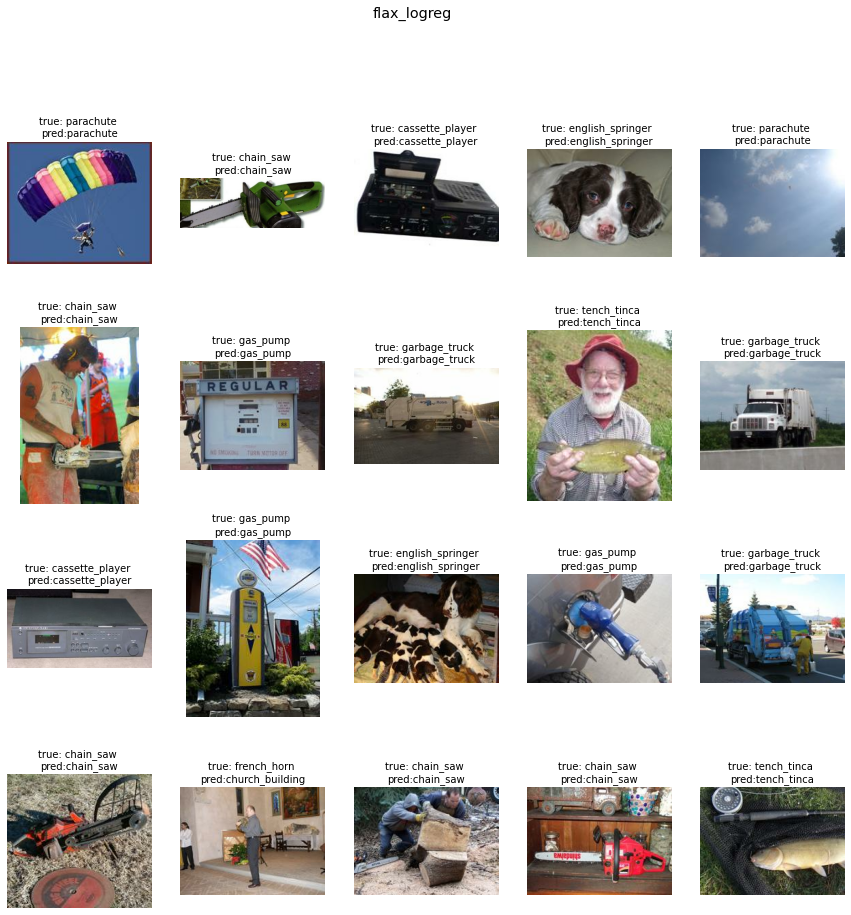

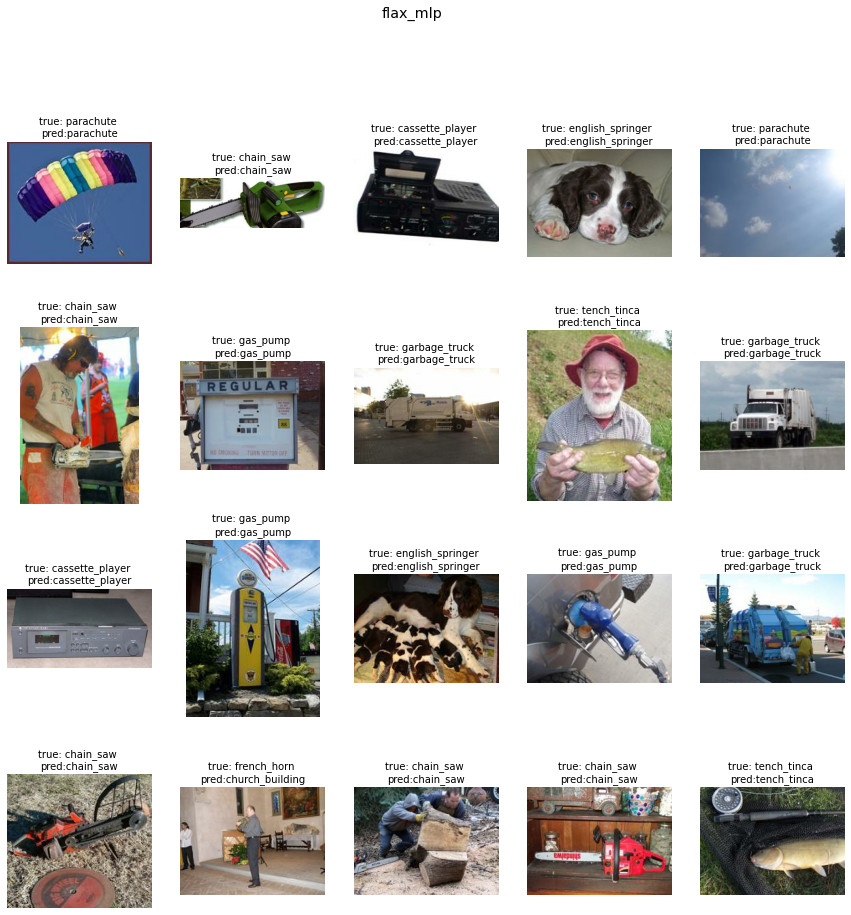

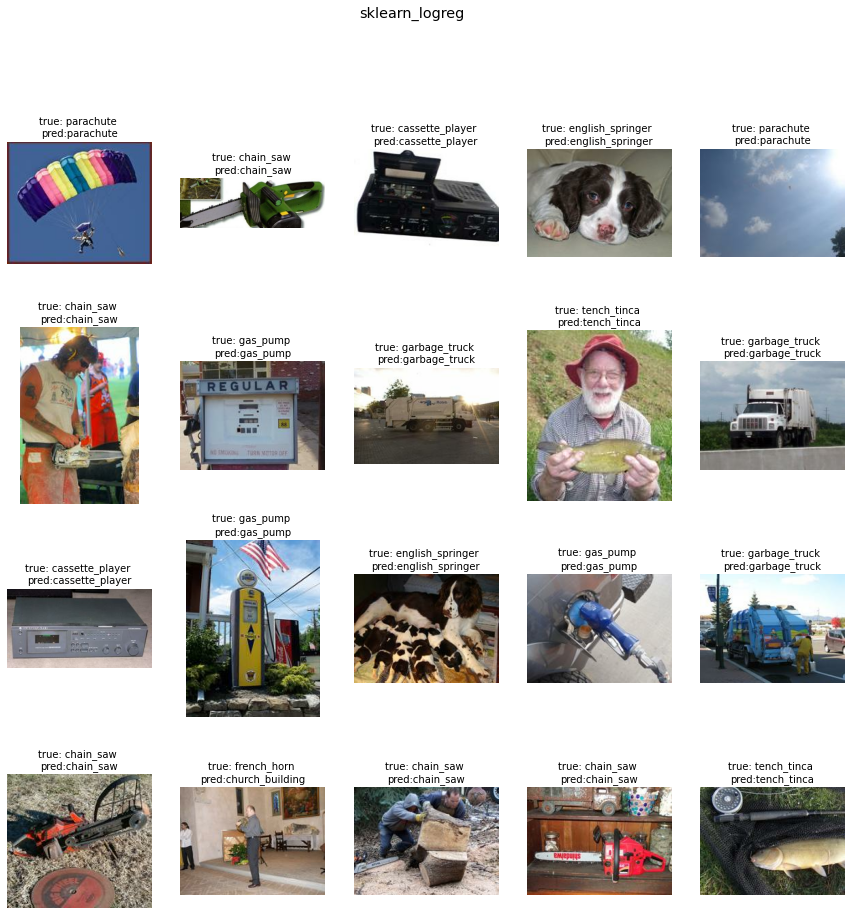

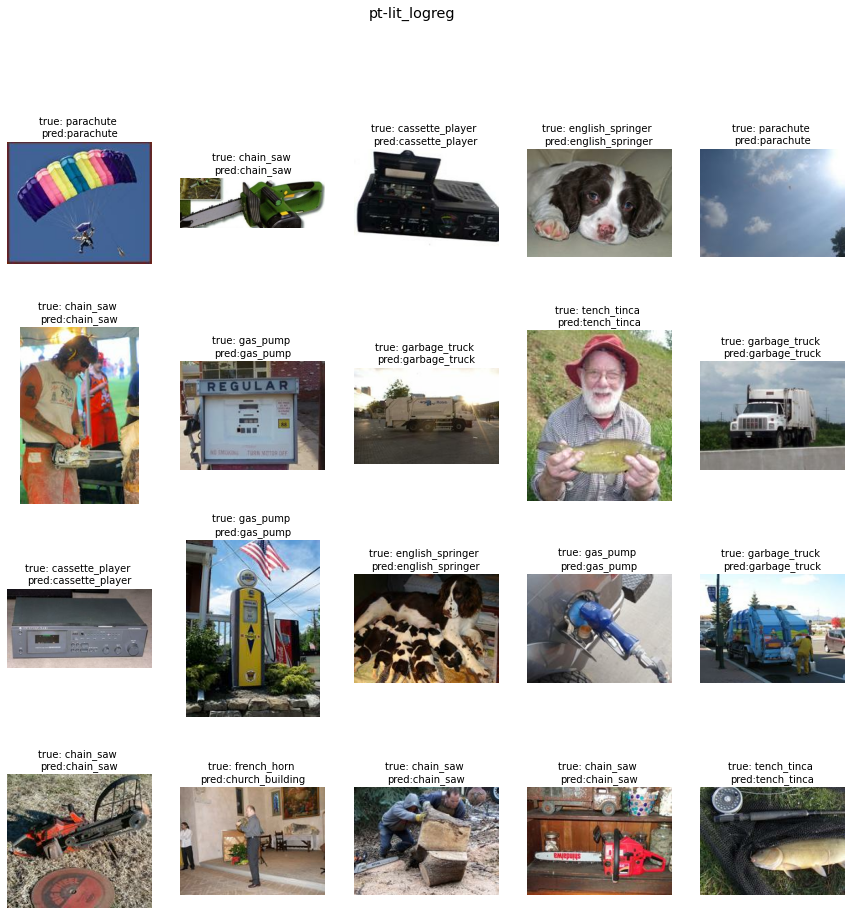

In [37]:
plot_first_n_results(test_preds_flax_logreg, name='flax_logreg')
plot_first_n_results(test_preds_flax_mlp, name='flax_mlp')
plot_first_n_results(test_preds_skl, name='sklearn_logreg')
plot_first_n_results(test_preds_lit_logreg, name='pt-lit_logreg')

### First N Missclassified test Images

In [38]:
def plot_first_n_mismatched(test_pred_labels, n_samples=20, name=''):

  # Making a dataset which contains **misclassified** samples along with predicted labels
  
  test_pred_labels_ds = tf.data.Dataset.from_tensor_slices(test_pred_labels)
  zipped_ds = tf.data.Dataset.zip((test_data, test_pred_labels_ds))

  def get_mismatched(ds):
    return ds.filter(lambda sample, pred_label: tf.math.not_equal(x=pred_label, y = sample[1]))

  mismatched_ds = zipped_ds.apply(get_mismatched)


  first_n_mismatched_ds = mismatched_ds.take(n_samples)

  first_n_mismatched_data = list(first_n_mismatched_ds.as_numpy_iterator())

  fig = plt.figure(figsize=(17,17))

  rows = math.floor(math.sqrt(n_samples))
  cols = n_samples//rows

  for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    (image, true_label), pred_label = first_n_mismatched_data[i]
    plt.imshow(image)
    plt.title(f'true: {class_names[true_label]} \npred:{class_names[pred_label]}',fontsize = 10)
    plt.axis('off')
  plt.suptitle(f'{name}_mismatched', fontsize='x-large')
  plt.show()



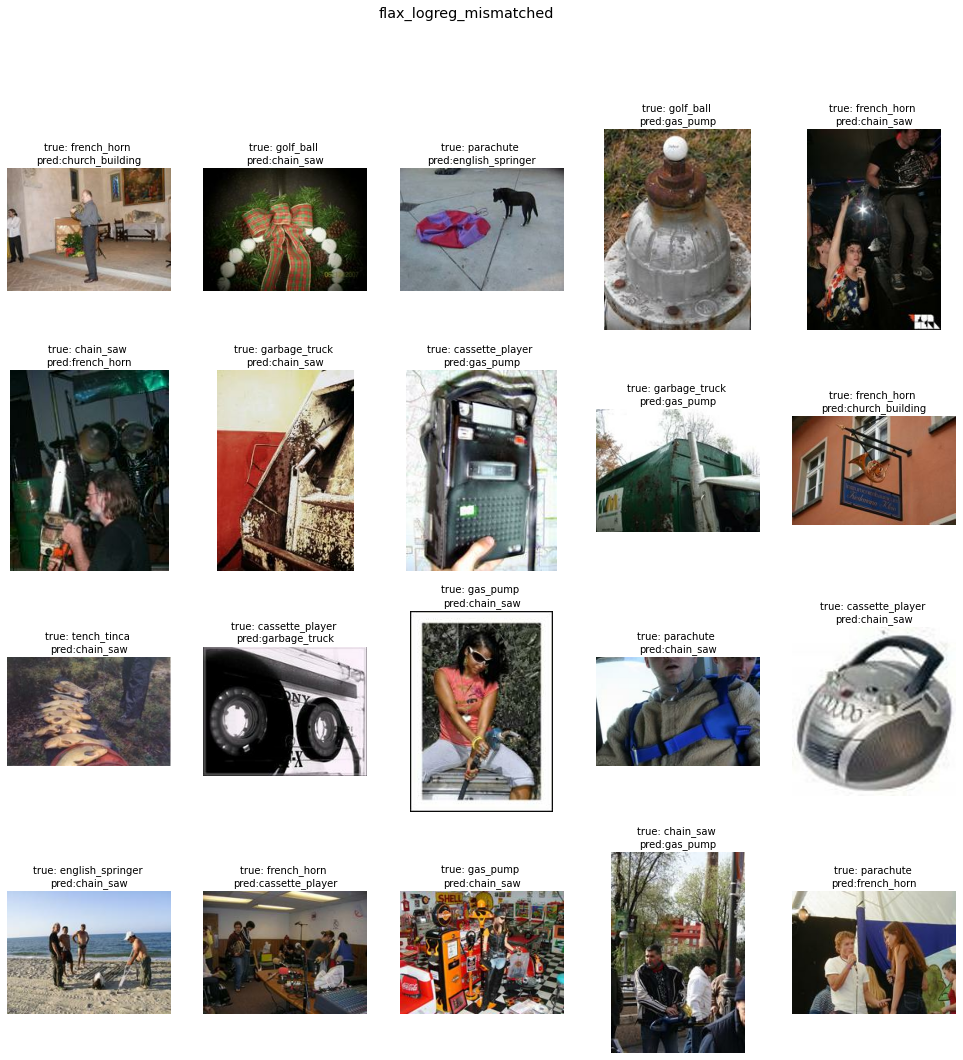

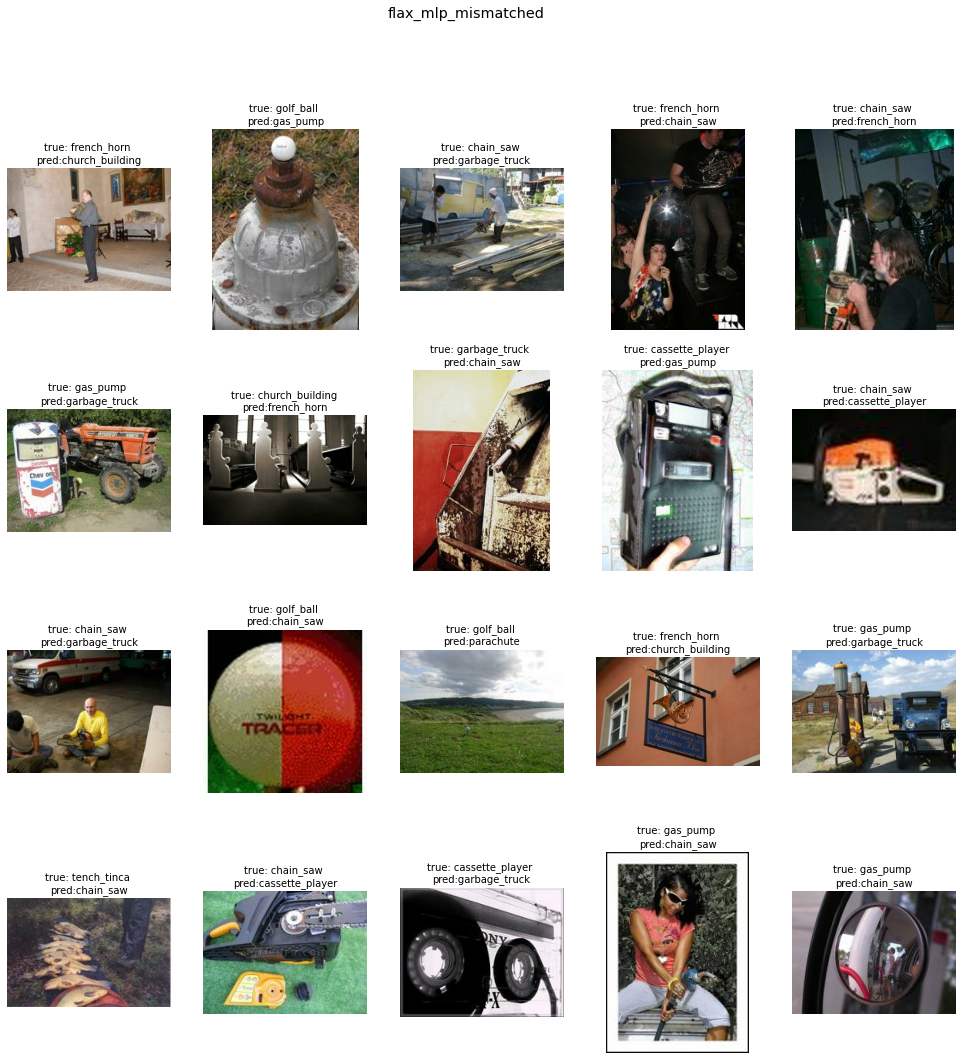

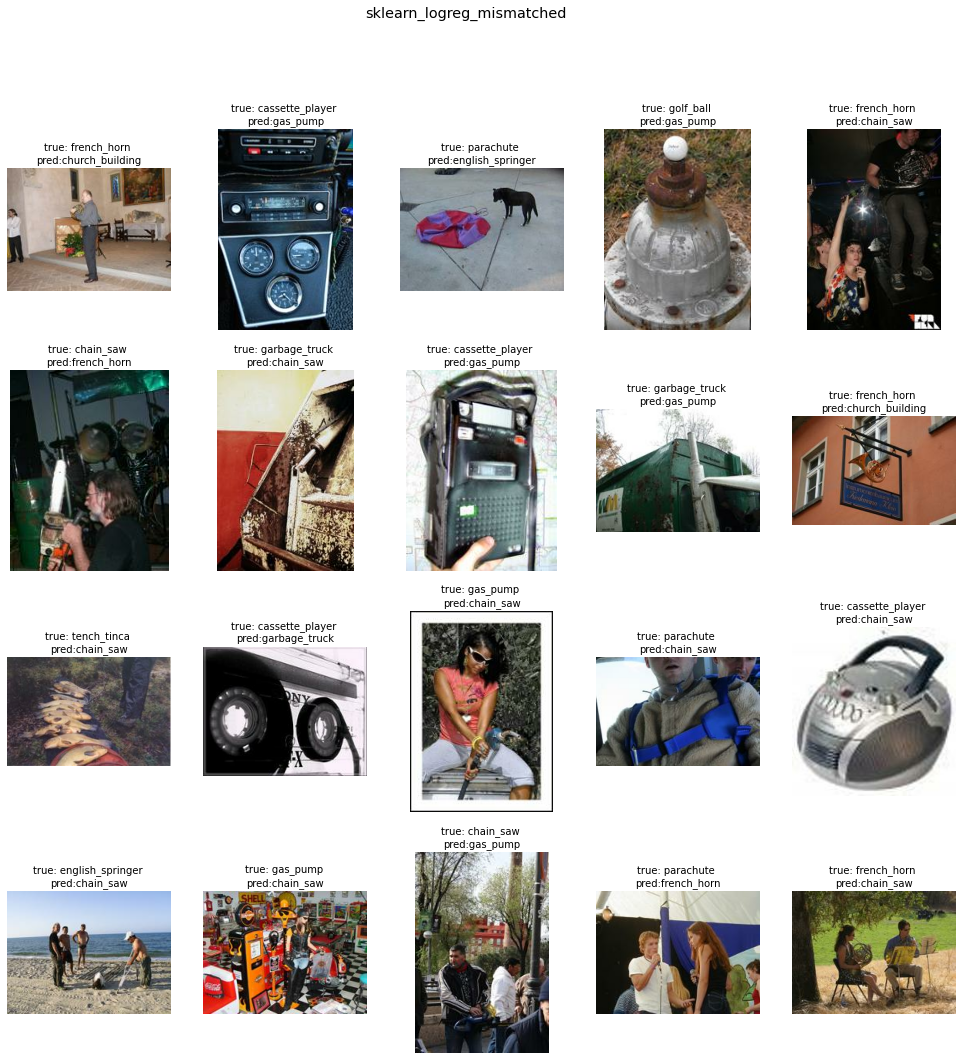

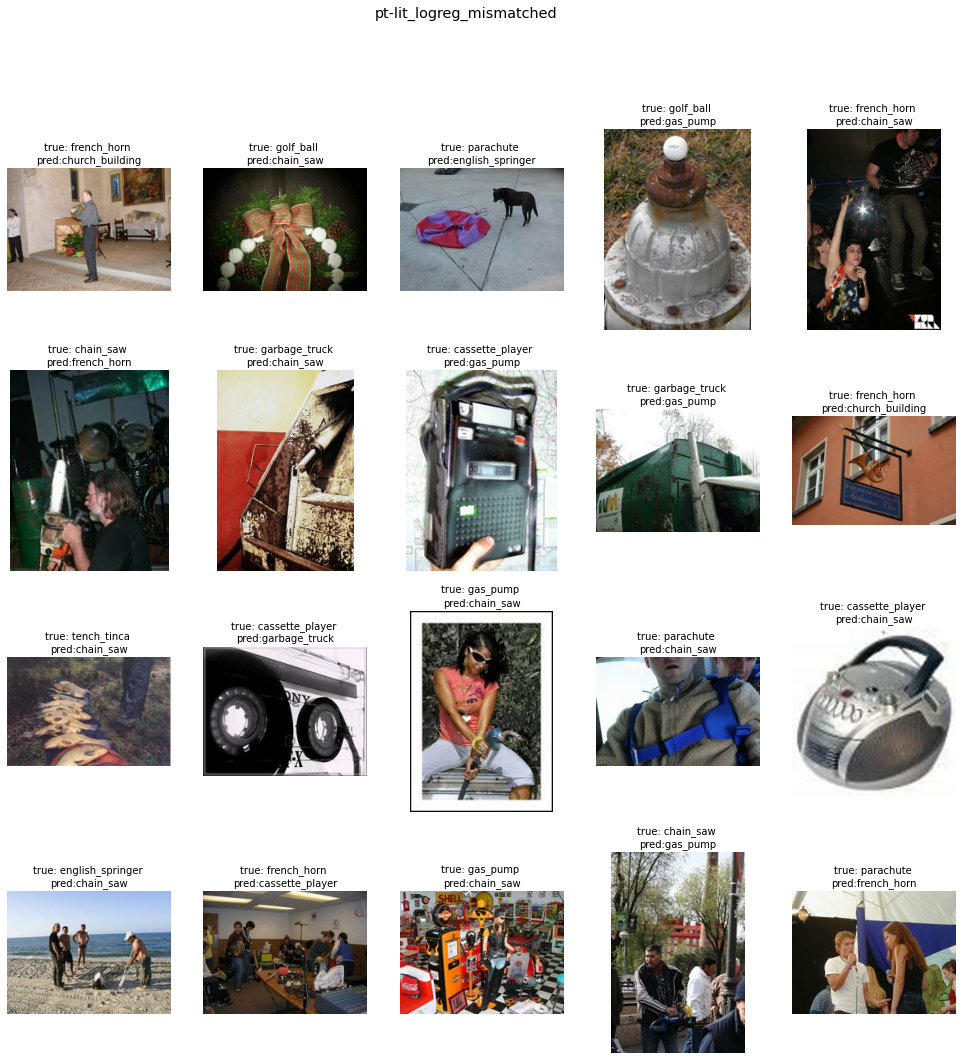

In [39]:
plot_first_n_mismatched(test_preds_flax_logreg, name='flax_logreg')
plot_first_n_mismatched(test_preds_flax_mlp, name='flax_mlp')
plot_first_n_mismatched(test_preds_skl, name='sklearn_logreg')
plot_first_n_mismatched(test_preds_flax_logreg, name='pt-lit_logreg')

### END